In [4]:
# Voy a realizar algunos Análisis Exploratorio de Datos (EDA) 

In [5]:
# Importo las librerias que me brinda Python.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
import seaborn as sns
import sklearn.model_selection 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [7]:
# Realizo la importación de los datos.

df = pd.read_csv('celulares.csv', encoding='latin1')
df.head()

,ID,Título,Precio,Precio Original,Condición,Cantidad disponible,Marca,Envío gratuito
0,MLA1422976047,Celular Quantum Q10 Negro 4gb Ram + 128gb,148800.0,193999.0,new,1,Quantum,True
1,MLA1570099690,Moto G84 5g Color Viva Magenta,499999.0,549999.0,new,50,Motorola,True
2,MLA1658689660,Xiaomi Redmi Note 11 4gb Ram 128gb Rom Color G...,323519.0,369999.0,new,50,Xiaomi,True
3,MLA1471211850,Motorola Moto E22 64gb Azul 4gb Ram,229999.0,249999.0,new,500,Motorola,True
4,MLA1399356383,Teléfono Celular Tcl 408 (6+64) Gravity Gray Rva,189999.0,222599.0,new,1,TCL,True


In [8]:
# Realizo la función shape para comprobar los registros y columnas de mi dataset. 

df.shape

(150, 8)

In [10]:
# Consulto si hay algún valor null (NaN), me devolverá un booleano que en caso de ser true es porque si hay valores Nan.

df.isnull().values.any()

True

In [11]:
# Averiguo en que columnas hay valores null.

df.isnull().any()

ID                     False
Título                 False
Precio                 False
Precio Original         True
Condición              False
Cantidad disponible    False
Marca                  False
Envío gratuito         False
dtype: bool

In [12]:
# únicamente tuve valores null en la columna Precio Original, por lo que decido eliminarla para simplificar de manera resolutiva.

df.drop(["Precio Original"], axis = 1, inplace = True)
df.head()

,ID,Título,Precio,Condición,Cantidad disponible,Marca,Envío gratuito
0,MLA1422976047,Celular Quantum Q10 Negro 4gb Ram + 128gb,148800.0,new,1,Quantum,True
1,MLA1570099690,Moto G84 5g Color Viva Magenta,499999.0,new,50,Motorola,True
2,MLA1658689660,Xiaomi Redmi Note 11 4gb Ram 128gb Rom Color G...,323519.0,new,50,Xiaomi,True
3,MLA1471211850,Motorola Moto E22 64gb Azul 4gb Ram,229999.0,new,500,Motorola,True
4,MLA1399356383,Teléfono Celular Tcl 408 (6+64) Gravity Gray Rva,189999.0,new,1,TCL,True


In [13]:
# Constato que ahora no se encuentran valores null en el dataset.

df.isnull().values.any()

False

In [18]:
# Analizaré los datos que tienen que ver con las Marcas de celulares.
# Calculo el promedio de cada Marca de Celular según su valor Precio. 
promedio_por_marca = df.groupby("Marca")["Precio"].mean()

# Defino una función para formatear los números
def formato_precio(numero):
    return f"${numero:,.2f}"  # Agrega separadores de miles y dos decimales

# Aplico la función de formato a la Serie 'promedio_por_marca'
promedio_por_marca_formateado = promedio_por_marca.map(formato_precio)

# Muestro el resultado formateado
print("Promedio por Marca:")
print(promedio_por_marca_formateado)


Promedio por Marca:
Marca
Alcatel                $228,969.00
Apple                $1,192,635.55
BLU                     $95,550.80
CAT                    $403,363.50
Doogee                 $660,000.00
Excess                  $32,933.00
GENERICO 106 f183       $49,898.00
Kanji                   $25,512.00
Kodak                   $92,477.80
Konka                  $165,729.50
LG                      $98,898.00
Motorola               $371,572.57
Noblex                  $97,484.00
Nokia                   $63,731.50
Philco                  $61,999.00
Pixpro                  $54,500.00
Quantum                $112,492.12
Roadstar                $57,498.00
Samsung                $489,703.39
TCL                    $234,749.00
Xiaomi                 $403,926.65
ZTE                    $148,165.67
iPro                    $51,257.88
Name: Precio, dtype: object


In [24]:
# Calculo el porcentaje representativo de cada Marca de Celular.

# Elimino el símbolo de dólar y convierto las cadenas en números
promedio_por_marca_numerico = promedio_por_marca_formateado.replace({'\$': '', ',': ''}, regex=True).astype(float)

# Calculo el total
total = promedio_por_marca_numerico.sum()

# Calculo el porcentaje representativo de cada marca de celular
porcentaje_por_marca = (promedio_por_marca_numerico / total) * 100

# Muestro el resultado
print("\nPorcentaje por Marca:\n", porcentaje_por_marca)


Porcentaje por Marca:
 Marca
Alcatel               4.409146
Apple                22.966008
BLU                   1.839976
CAT                   7.767376
Doogee               12.709302
Excess                0.634175
GENERICO 106 f183     0.960862
Kanji                 0.491272
Kodak                 1.780800
Konka                 3.191373
LG                    1.904431
Motorola              7.155194
Noblex                1.877202
Nokia                 1.227247
Philco                1.193885
Pixpro                1.049480
Quantum               2.166206
Roadstar              1.107211
Samsung               9.429982
TCL                   4.520448
Xiaomi                7.778221
ZTE                   2.853155
iPro                  0.987048
Name: Precio, dtype: float64


In [25]:
# Determino cual es la Marca con mayor porcentaje de todos.

tipo_mayor = porcentaje_por_marca.idxmax()
print("\nTipo con mayor porcentaje:", tipo_mayor)


Tipo con mayor porcentaje: Apple


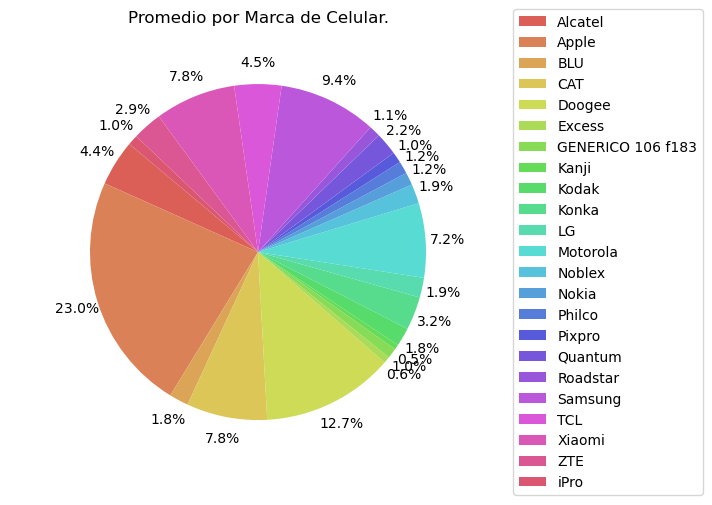

In [51]:
# Vuelco los valores en un gráfico representativo.


# Obtengo una lista de 23 colores distintos de la paleta de colores de Seaborn
colores = sns.color_palette('hls', n_colors=23)

# Vuelco los valores en un gráfico representativo.
plt.pie(porcentaje_por_marca, colors=colores, autopct='%1.1f%%', startangle=140, pctdistance=1.13)
plt.axis('equal')
plt.title('Promedio por Marca de Celular.', y=1.1)  # Mover el título hacia arriba

# Mostrar leyenda con etiquetas y colores al costado del gráfico
plt.legend(porcentaje_por_marca.index, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [52]:
# Para los datos de los Celulares con Envío gratuito.
# Cuento la cantidad de ocurrencias de cada valor en la columna "Envío gratuito"
# Obtengo el porcentaje de Celulares con Envío gratuito.

envio_gratuito_counts = df['Envío gratuito'].value_counts()
percentage_envio_gratuito = (envio_gratuito_counts[True] / len(df)) * 100

print(f"Porcentaje de Celulares con Envio gratuito: {percentage_envio_gratuito:.1f}%")

Porcentaje de Celulares con Envio gratuito: 100.0%


In [66]:
# Ahora trabajaré con un valor agregado de clasificación para mis datos.
# Decido crear un concepto nuevo denominado Calificación partiendo de los valores de precio y etiquetándolos según un criterio.

df['Calificación'] = pd.cut(df.Precio, bins=[0,350000 ,700000, 1200000 ,float('inf')], labels=['Barato','Moderado','Caro','Premium'])

In [64]:
# Noto que ya se reconoce a Calificación como una columna más.

df[['Marca','Calificación','Precio']].shape

(150, 3)

In [67]:
# Obtengo la cantidad de registros por Calificación

df.Calificación.value_counts()

Calificación
Barato      96
Moderado    33
Caro        14
Premium      7
Name: count, dtype: int64

In [69]:
# Outliers normalizados. 

df.Calificación.value_counts(normalize=True)

Calificación
Barato      0.640000
Moderado    0.220000
Caro        0.093333
Premium     0.046667
Name: proportion, dtype: float64

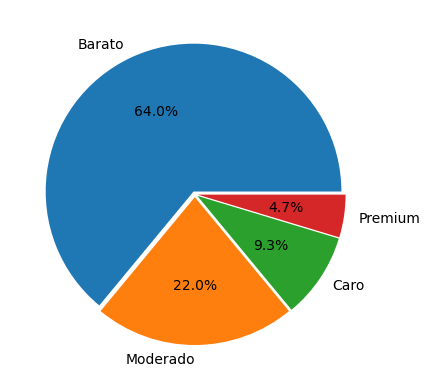

In [72]:
# Guardo los valores en una variable
calificacion_counts = df.Calificación.value_counts(normalize=True)

# Grafico el conteo de cada categoría en un gráfico de pastel
explode = [0.02] * len(calificacion_counts)
calificacion_counts.plot.pie(autopct='%1.1f%%', ylabel='', explode=explode)
plt.show()

In [73]:
# Obtengo el total de la suma de sus Precios.

df.groupby(['Calificación'])['Precio'].sum()

Calificación
Barato      17105130.15
Moderado    16686252.00
Caro        12570461.80
Premium     10935294.45
Name: Precio, dtype: float64

In [75]:
# Determino la media 
media_precios_por_calificacion = df.groupby(['Calificación'])['Precio'].mean()

# Aplicar la función de formato a cada número de la media de precios
media_precios_por_calificacion_formateada = media_precios_por_calificacion.apply(formato_precio)

# Mostrar los resultados
print(media_precios_por_calificacion_formateada)

Calificación
Barato        $178,178.44
Moderado      $505,644.00
Caro          $897,890.13
Premium     $1,562,184.92
Name: Precio, dtype: object


In [78]:
# Decido agrupar mis datos por Marca y ver la suma de sus precios.

# Agrupar por marca
datos_agrupados_marca = df.groupby('Marca')

# Obtener la suma de precios por marca
suma_precios_marca = datos_agrupados_marca['Precio'].sum()

# Mostrar la suma de precios por marca
print("Suma de precios por marca:")
print(suma_precios_marca)

Suma de precios por marca:
Marca
Alcatel                228969.00
Apple                13118991.05
BLU                    477754.00
CAT                   1613454.00
Doogee                 660000.00
Excess                  32933.00
GENERICO 106 f183       49898.00
Kanji                   25512.00
Kodak                  462389.00
Konka                  331459.00
LG                      98898.00
Motorola             10404032.00
Noblex                 194968.00
Nokia                  254926.00
Philco                  61999.00
Pixpro                  54500.00
Quantum                674952.75
Roadstar                57498.00
Samsung              16649915.20
TCL                   1408494.00
Xiaomi                9290313.00
ZTE                    888994.00
iPro                   256289.40
Name: Precio, dtype: float64


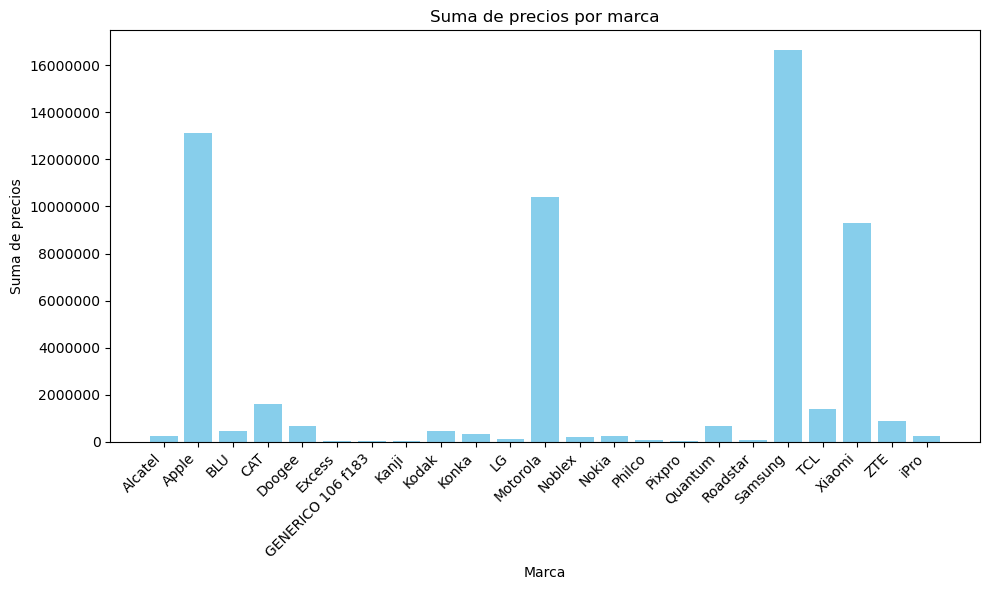

In [90]:
# Creo el gráfico de columnas
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
barras = plt.bar(suma_precios_marca.index, suma_precios_marca, color='skyblue')  # Crear barras con color azul celeste

# Personalizo el gráfico
plt.xlabel('Marca')
plt.ylabel('Suma de precios')
plt.title('Suma de precios por marca')
plt.xticks(rotation=45, ha='right')  # Rotar y alinear las etiquetas de marca
plt.ticklabel_format(style='plain', axis='y')  # Mostrar números completos en el eje y
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# REGRESIÓN LINEAL SIMPLE (RLS)
# La regresión lineal simple (RLS) es un algoritmo de aprendizaje automático supervisado que se utiliza para modelar la relación entre dos variables. 
# una variable dependiente (y) y una variable independiente (x). 
# El objetivo del algoritmo es encontrar una línea recta que mejor se ajuste a los datos observados y que pueda usarse para predecir el valor de y para nuevos valores de x

In [109]:
# Realizo la importación de los datos.

df = pd.read_csv('celulares.csv', encoding='latin1')
df.head()

,ID,Título,Precio,Precio Original,Condición,Cantidad disponible,Marca,Envío gratuito
0,MLA1422976047,Celular Quantum Q10 Negro 4gb Ram + 128gb,148800.0,193999.0,new,1,Quantum,True
1,MLA1570099690,Moto G84 5g Color Viva Magenta,499999.0,549999.0,new,50,Motorola,True
2,MLA1658689660,Xiaomi Redmi Note 11 4gb Ram 128gb Rom Color G...,323519.0,369999.0,new,50,Xiaomi,True
3,MLA1471211850,Motorola Moto E22 64gb Azul 4gb Ram,229999.0,249999.0,new,500,Motorola,True
4,MLA1399356383,Teléfono Celular Tcl 408 (6+64) Gravity Gray Rva,189999.0,222599.0,new,1,TCL,True


In [110]:
# Deseo quedarme únicamente con esas dos columnas, asi que elimino las demás.

df.drop(["ID"], axis = 1, inplace = True)
df.drop(["Título"], axis = 1, inplace = True)
df.drop(["Precio Original"], axis = 1, inplace = True)
df.drop(["Condición"], axis = 1, inplace = True)
df.drop(["Marca"], axis = 1, inplace = True)
df.drop(["Envío gratuito"], axis = 1, inplace = True)
df.head()

,Precio,Cantidad disponible
0,148800.0,1
1,499999.0,50
2,323519.0,50
3,229999.0,500
4,189999.0,1


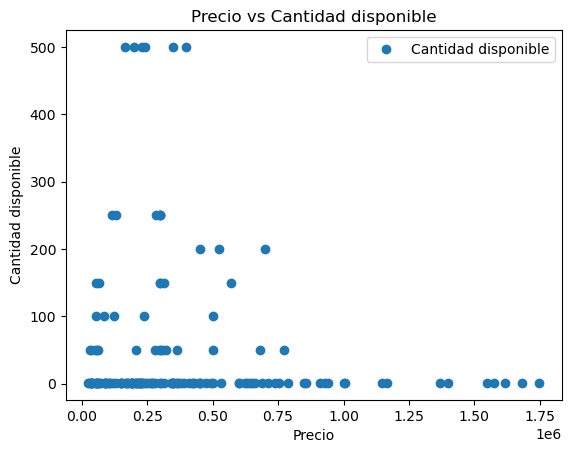

In [112]:
# Gráfico los puntos de datos en un diagrama en dos dimensiones para ilustrar el dataset.
# Verifico si manualmente puedo encontrar alguna relación entre los datos.
# Vemos una proyección ascendente en este caso.

df.plot(x='Precio', y='Cantidad disponible', style='o') 
plt.title('Precio vs Cantidad disponible') 
plt.xlabel('Precio') 
plt.ylabel('Cantidad disponible') 
plt.show()

# A Simple vista puedo observar que no se ve relación en estas variables.
# Sin embargo continuaré con el analisis para desarrllar este algoritmo.

d:\Anacondist\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

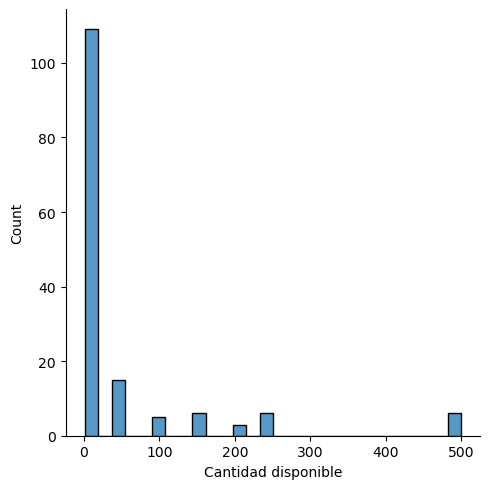

In [114]:
# Busco el valor de Precio Original promedio y lo represento con un gráfico de barras.

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.displot(df['Cantidad disponible'])

In [115]:
# Dividido los datos en variable independiente y variable dependiente cuyos valores se deben predecir. 

X = df['Precio'].values.reshape(-1,1)
y = df['Cantidad disponible'].values.reshape(-1,1)
df_aux = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})
df_aux

,X,y
0,148800.0,1
1,499999.0,50
2,323519.0,50
3,229999.0,500
4,189999.0,1
...,...,...
145,1366999.0,1
146,788999.0,1
147,421999.0,1
148,660000.0,1


In [116]:
# Utilizo train_test_split para dividir un dataset en bloques. 
# Conjunto de testing y conjunto de entrenamiento.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
df_aux = pd.DataFrame({'X_train': X_train.flatten(), 'y_train': y_train.flatten()})
df_aux.head()

,X_train,y_train
0,349999.00,1
1,682499.00,50
2,257999.00,1
3,38898.00,1
4,1682999.45,1


In [117]:
df_aux = pd.DataFrame({'X_test': X_test.flatten(), 'y_test': y_test.flatten()})
df_aux.head()

,X_test,y_test
0,429888.0,1
1,165399.0,500
2,189999.0,1
3,450000.0,1
4,169411.0,1


In [118]:
# Realizo el entrenamiento del algoritmo

regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression()

In [119]:
# obtengo el interceptor.

print(regressor.intercept_)

[59.68732656]


In [120]:
# obtengo la pendiente.

print(regressor.coef_)

[[-3.48468265e-05]]


In [ ]:
# El resultado debe ser aproximadamente 59.68732656 y -3.48468265e-05 respectivamente. 
# Esto significa que por cada unidad de cambio en el precio, 
# el cambio en la Cantidad disponible es de al rededor de -3.484e-05%.
# son valores que siguen haciendo ruido, pero continuaré con el analisis, ya que el objetivo es descriptivo mas que llegar a un resultado particular.


In [121]:
# Utilizo el método predict() para tomar este conjunto de características y devolver las predicciones correspondientes para la variable dependiente.

y_pred = regressor.predict(X_test)

In [122]:
# Percibo que el valor que obtengo en la columna Predicted se acerca bastante al Actual.

df_aux = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_aux

,Actual,Predicted
0,1,44.707094
1,500,53.923696
2,1,53.066464
3,1,44.006255
4,1,53.783891
5,1,5.779321
6,1,57.683704
7,1,51.708484
8,1,37.908060
9,1,49.185852


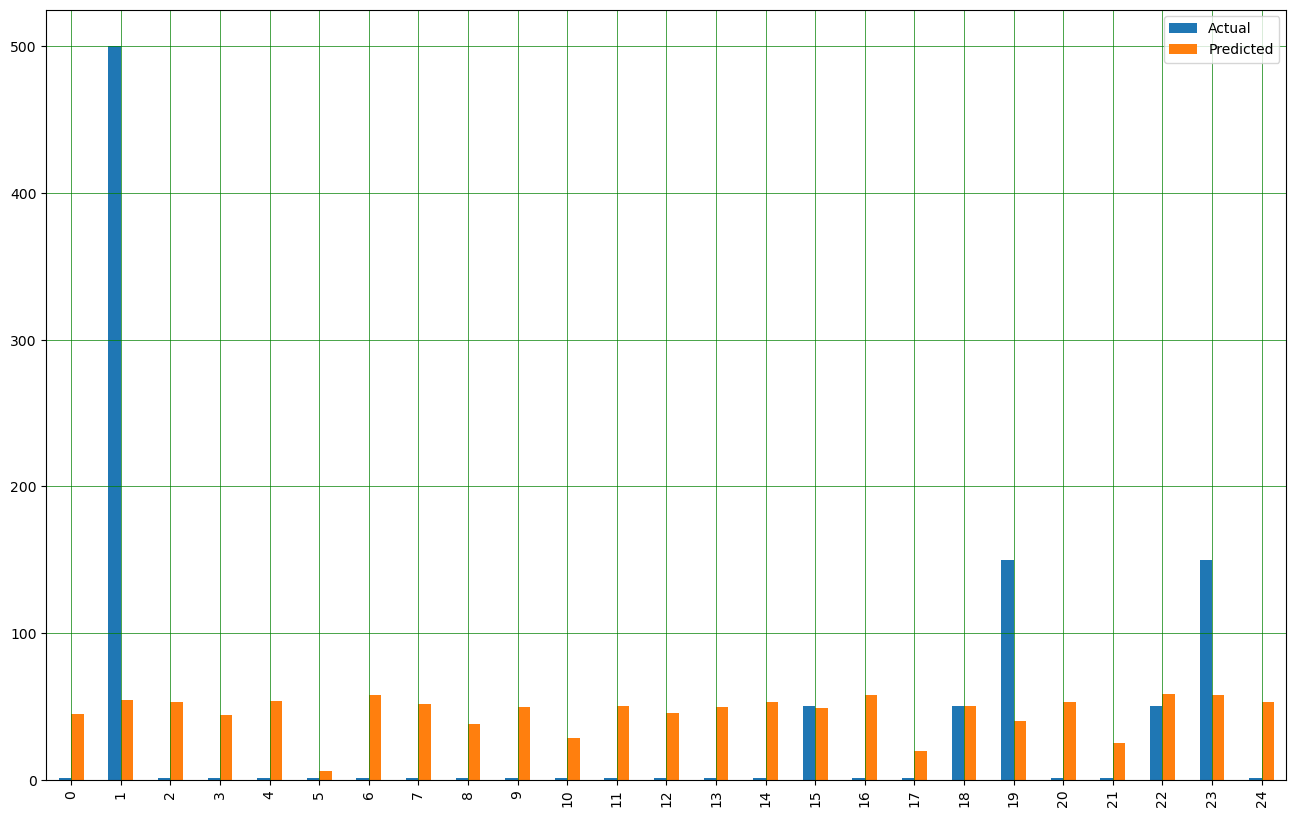

In [123]:
# Realizo un gráfico de barras mostrando la comparación de valores reales y predichos.
# Tomo unos 25 registros.


df1 = df_aux.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

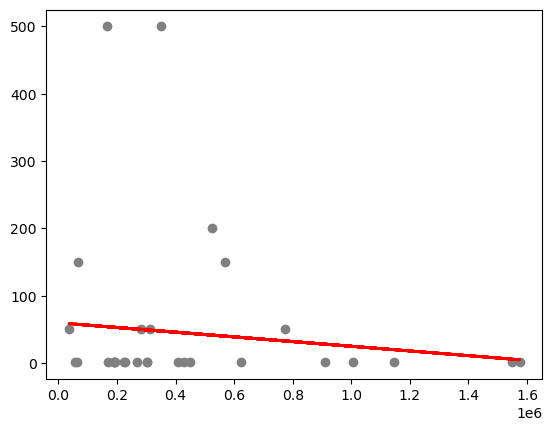

In [124]:
# Los porcentajes predichos en su mayoria no se acercan a los reales. 
# Trazo una línea recta con los datos de la prueba.

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
# Finalmente analizaré el Error Absoluto Medio, el Error Cuadratico Medio y la Raíz del error cuadrático medio.
# El Error Absoluto Medio mide la magnitud promedio de los errores en las predicciones del modelo. Se calcula tomando la diferencia absoluta entre cada valor predicho y el valor real, y luego promediando esos errores.
# El Error Cuadrático Medio calcula el promedio de los errores al cuadrado entre las predicciones y los valores reales. Al elevar los errores al cuadrado, este métrica da más peso a los errores más grandes.
# La Raíz del Error Cuadrático Medio es simplemente la raíz cuadrada del MSE. Proporciona una medida del error promedio, similar al MAE, pero está en la misma escala que los valores originales.

In [125]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Error Cuadratico Medio:', metrics.mean_squared_error(y_test, y_pred)) 
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Absoluto Medio: 71.81106338984901
Error Cuadratico Medio: 16367.525192028399
Raíz del error cuadrático medio: 127.93562909537124


In [ ]:
# Teniendo en cuenta estos valores, puedo sacar algunas conclusiones:

# El Error Absoluto Medio de aproximadamente 71.81 indica que, en promedio, las predicciones difieren del valor real en aproximadamente 71.81 unidades en la escala de Cantidad disponible.
# El Error Cuadrático Medio de aproximadamente 16367.52 muestra que los errores entre las predicciones y los valores reales pueden ser mayores en magnitud debido al efecto del cuadrado.
# La Raíz del Error Cuadrático Medio de aproximadamente 127.93 indica que, en promedio, las predicciones difieren del valor real en aproximadamente 127.93 unidades en la escala de Cantidad disponible.

# Por lo tanto, los resultados indican que el modelo tiene un error promedio Extremadamente alto en las predicciones de Cantidad disponible con respecto a Precio.
# El error Cuadratico se encuentra además muy por fuera de los valores acordes ya que no deberia pasar el 10% de la media de Cantidad disponible
# En lineas generales, si bien habia indicios a la vista de los graficos, la conclusión en general es que no hay ningun tipo de relación entre estas variables y hay una justificación tecnica por lo plasmado.